In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns
import unidecode

In [324]:
#Lendo dados
drogas_entrada = pd.read_csv('Dados/resultado_drogas.csv', encoding = 'latin-1', sep = ';', index_col=0)
drogas_entrada.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_OBJETO,NRO_INT_TIPO_OBJETO,TIPO_OBJETO,QUANTIDADE,ATRIBUTO
ORGAO_OCOR,,,,,,,
100829,2021,1137,23703381,756,Cocaína,Grama,Unidade de Peso
151321,2020,1129,22817480,5,Maconha,Grama,Unidade de Peso
150808,2020,15392,23048116,5,Maconha,Verde,Cor Predominante
100510,2020,16612,23076594,756,Cocaína,4 pinos de cocaína pesando aproximadamente o t...,Descrição
151008,2019,2462,20497307,1025,Drogas,1,Quantidade de Unidade(s)
151008,2019,2462,20497307,1025,Drogas,Porção(es),Tipo de Embalagem
150808,2019,20501,21804599,5,Maconha,Verde,Cor Predominante
152308,2020,5394,23251372,1025,Drogas,01,Quantidade de Unidade(s)
151707,2019,4116,21639890,5,Maconha,Verde,Cor Predominante


# Análises

In [465]:
def plota_frequencia(df, campo):
    freq_cor = df.groupby([campo]).size().reset_index(name="Quantidade").set_index(campo).sort_values('Quantidade', ascending=False)
    freq_cor['Frequência'] = df[campo].value_counts(normalize=True).round(6).astype(str)
    display(freq_cor.T)
    freq_cor.reset_index(inplace=True)
    freq_cor['Frequência'] = freq_cor['Frequência'].astype(float)
    freq_cor.plot.bar(x=campo, y='Frequência',width=0.5)

## UNIDADE DE PESO

Unidade de Peso,Grama,Não soube informar,Quilograma,Miligrama,Decigrama,Tonelada
Quantidade,89308,4720,1474,1200,288,5
Frequência,0.920748,0.048662,0.015197,0.012372,0.002969,5.2e-05


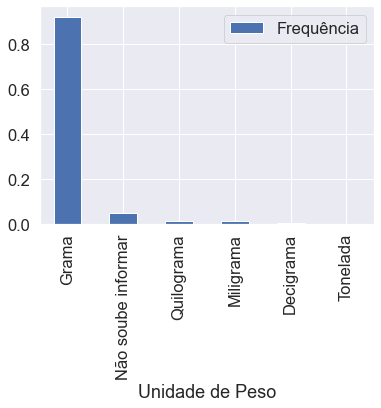

In [470]:
plota_frequencia(reclassificacao, 'Unidade de Peso')

## COR PREDOMINANTE

Cor Predominante,Verde,Branco,Amarelo,Marrom,Bege,Incolor,Cinza,Preto,Azul,Prateado,Laranja,Vermelho,Cobreado,Rosa,Dourado,Salmon,Roxo,Lilás
Quantidade,53192,31096,17331,6545,2210,565,543,415,260,224,186,174,161,150,109,34,27,9
Frequência,0.469765,0.274624,0.153059,0.057802,0.019518,0.00499,0.004796,0.003665,0.002296,0.001978,0.001643,0.001537,0.001422,0.001325,0.000963,0.0003,0.000238,7.9e-05


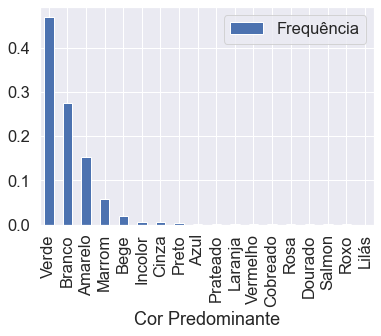

In [466]:
plota_frequencia(reclassificacao, 'Cor Predominante')

## TIPO DE EMBALAGEM

Tipo de Embalagem,Porção(es),Cigarro(s),Tijolo(s),Unidade(s),Saco(s),Pacote(s),Não soube informar,Frasco(s),Comprimido(s),Caixa(s),Ponto(s),Maço(s),Lata(s),Fardo(s),Lote(s),Garrafa(s),Galão(es),Kit(s),Jogo(s)
Quantidade,80822,9302,7676,7478,2185,1682,1557,1163,488,359,172,165,66,34,30,25,15,11,1
Frequência,0.71378,0.082151,0.067791,0.066042,0.019297,0.014855,0.013751,0.010271,0.00431,0.003171,0.001519,0.001457,0.000583,0.0003,0.000265,0.000221,0.000132,9.7e-05,9e-06


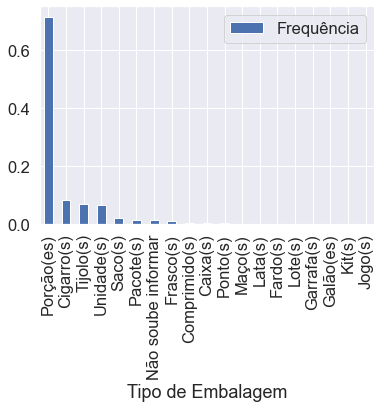

In [467]:
plota_frequencia(reclassificacao, 'Tipo de Embalagem')

## Iniciando tratamento de PESOS

In [476]:
def corrige_hifen(x):
    if pd.isna(x) or x == '-':
        return 0
    return x
reclassificacao['QTDE_POR_UNIDADE'] = reclassificacao['Quantidade de Unidade(s)'].apply(corrige_hifen).astype(float) 
reclassificacao['VAL_PESO_UNITARIO'] = reclassificacao['Peso Unitário'].apply(corrige_hifen).astype(float) 
reclassificacao[reclassificacao['Quantidade de Unidade(s)'] != reclassificacao['Nova Qtde Unidade']]

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso,DESC_PADRAO,RECLASSIFICAÇÃO,Nova Qtde Unidade
23,19625511,2018,5643,1025,Drogas,Verde,NaN,"7,00","0,00",-,Porção(es),Grama,<NA>,Drogas,0
1145,20574018,2019,440,1025,Drogas,Verde,"0,4 DE UMA PORÇÃO SEMELHANTE A MACONHA.","0,04","0,04",-,Porção(es),Grama,04 de uma porcao semelhante a maconha,Maconha,0
19818,22477055,2020,10583,1025,Drogas,Verde,03 TIJOLOS DE SUBSTÂNCIA SEMELHANTE A MACONHA,NaN,NaN,-,Tijolo(s),Não soube informar,03 tijolos de substancia semelhante a maconha,Maconha,0
494,20180967,2018,8338,757,Crack,Amarelo,"3 pedras de crack pesando aproximadamente 0,40...",NaN,"0,40",-,Porção(es),Grama,3 pedras de crack pesando aproximadamente 040 ...,Crack,0


In [176]:
#Mudando o float do padrão brasileiro para o americano
#Criando novas colunas de Peso para analise e diferenciação de valores entre nova e antiga
reclassificacao['Novo Peso Unitário'] = pd.to_numeric(reclassificacao['Peso Unitário'].str.replace(',','.'), errors='coerce',downcast="float")
reclassificacao['Novo Peso Total'] = pd.to_numeric(reclassificacao['Peso Total'].str.replace(',','.'), errors='coerce',downcast="float")

#Trocando dados NaN por 0
reclassificacao['Novo Peso Unitário'] = reclassificacao['Novo Peso Unitário'].fillna(0).astype(float)
reclassificacao['Novo Peso Total'] = reclassificacao['Novo Peso Total'].fillna(0).astype(float)
#Mostrar mudança nas colunas peso
reclassificacao.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso,RECLASSIFICAÇÃO,Novo Peso Unitário,Novo Peso Total
CHAVE_OBJETO,,,,,,,,,,,,,,
11228824,2009,3209,1025,Drogas,Amarelo,<NA>,"0,42",NaN,4,Não soube informar,NaN,Drogas,0.0,0.420000
19443979,2018,1191,1025,Drogas,Verde,<NA>,"14,34",NaN,2,Porção(es),Grama,Drogas,0.0,14.340000
19443985,2018,1191,1025,Drogas,Amarelo,<NA>,"2,74",NaN,26,Unidade(s),Grama,Drogas,0.0,2.740000
19444713,2018,1191,1025,Drogas,Verde,<NA>,"5,00",NaN,2,Porção(es),Grama,Drogas,0.0,5.000000
19444722,2018,1191,1025,Drogas,Branco,<NA>,"1,50",NaN,3,Cigarro(s),Grama,Drogas,0.0,1.500000
19449101,2018,3449,1025,Drogas,Verde,<NA>,"112,05",34,3,Porção(es),Grama,Drogas,34.0,112.050003
19478366,2018,4293,1025,Drogas,Verde,<NA>,"2,80",NaN,1,Porção(es),Grama,Drogas,0.0,2.800000
19481385,2018,4027,1025,Drogas,Verde,<NA>,NaN,15,1,Pacote(s),Grama,Drogas,15.0,0.000000
19510027,2018,388,1025,Drogas,Verde,<NA>,"22,19",NaN,1,Porção(es),Grama,Drogas,0.0,22.190001


In [182]:
#converte peso unitário
def refactor(x,y):
    if 'Miligrama' in x:
        return y / 1000
    elif 'Quilograma' in x:
        return y * 100
    elif 'Decigrama' in x:
        return y / 10
    #if 'Tonelada' in x:
    #    return y * 1000000
    else:
        return y
        
reclassificacao['Novo Peso Unitário'] = reclassificacao.apply(lambda x: refactor(x['Unidade de Peso'], x['Novo Peso Unitário']), axis=1)
reclassificacao.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso,RECLASSIFICAÇÃO,Novo Peso Unitário,Novo Peso Total
CHAVE_OBJETO,,,,,,,,,,,,,,
11228824,2009,3209,1025,Drogas,Amarelo,<NA>,"0,42",NaN,4,Não soube informar,nan,Drogas,0.0,0.420000
19443979,2018,1191,1025,Drogas,Verde,<NA>,"14,34",NaN,2,Porção(es),Grama,Drogas,0.0,14.340000
19443985,2018,1191,1025,Drogas,Amarelo,<NA>,"2,74",NaN,26,Unidade(s),Grama,Drogas,0.0,2.740000
19444713,2018,1191,1025,Drogas,Verde,<NA>,"5,00",NaN,2,Porção(es),Grama,Drogas,0.0,5.000000
19444722,2018,1191,1025,Drogas,Branco,<NA>,"1,50",NaN,3,Cigarro(s),Grama,Drogas,0.0,1.500000
19449101,2018,3449,1025,Drogas,Verde,<NA>,"112,05",34,3,Porção(es),Grama,Drogas,34.0,112.050003
19478366,2018,4293,1025,Drogas,Verde,<NA>,"2,80",NaN,1,Porção(es),Grama,Drogas,0.0,2.800000
19481385,2018,4027,1025,Drogas,Verde,<NA>,NaN,15,1,Pacote(s),Grama,Drogas,15.0,0.000000
19510027,2018,388,1025,Drogas,Verde,<NA>,"22,19",NaN,1,Porção(es),Grama,Drogas,0.0,22.190001


# Exportação

In [479]:
analizes_export = reclassificacao[['CHAVE_OBJETO','Cor Predominante','Descrição','Peso Total','Peso Unitário','Tipo de Embalagem','RECLASSIFICAÇÃO']]
analizes_export.to_csv('dados/resultado_drogas.csv')